In [99]:
from qiskit.opflow import X, Y, Z, I, MatrixEvolution
from qiskit.circuit import Parameter

import warnings
import numpy as np
from scipy.linalg import expm
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 7]
%config InlineBackend.figure_format = 'retina'

#### Hamiltonian time evolution simulation

$$ \hat{H} = \frac{1}{2} \left( \hat{\sigma}_y \otimes \hat{\sigma}_y \otimes \hat{\sigma}_x +  \hat{\sigma}_x \otimes \hat{\sigma}_y \otimes \hat{\sigma}_z + \hat{\sigma}_z \otimes \hat{\sigma}_y \otimes \hat{\sigma}_x + \hat{\sigma}_z \otimes \hat{\sigma}_x \otimes \hat{\sigma}_y \right) $$

In [100]:
operator_H = ((Y ^ Y ^ X) + (X ^ Y ^ Z) + (Z ^ Y ^ X) + (Z ^ X ^ Y))*1/2

print(operator_H)

0.5 * YYX
+ 0.5 * XYZ
+ 0.5 * ZYX
+ 0.5 * ZXY


In [101]:
H = operator_H.to_matrix()

In [102]:
H.shape

(8, 8)

$
\newcommand\bra[2][]{#1\langle {#2} #1\rvert}
\newcommand\ket[2][]{#1\lvert {#2} #1\rangle}
$
<center><b style="font-size: large;">Schrödinger equation</b></center><br/>
$$ \displaystyle \frac{d}{d t}\ket{\psi(t)}  = \ket{\psi}e^{-iHt} $$

In [103]:
def psi(t,psi0,H):
    lpsi = len(psi0)
    lH = H.shape[0]
    assert lpsi == lH
    
    psi0ket = np.array(psi0).reshape(lpsi,1)
    psitket = np.dot(expm(- 1j*t*H),psi0ket)
    return psitket

In [104]:
'initial state |psi(0)>'
psi0 = np.zeros((1, H.shape[1]))
psi0[0][0] = 1
psi0 = psi0.flatten().tolist()

In [105]:
tend = 10
steps = 100
tlist= np.linspace(0,tend, steps + 1)

'state at time t |psi(t)>'
psitketlist = [psi(tlist[i],psi0,H) for i in range(len(tlist))]

In [106]:
'probs'
p00list = [np.abs(psitketlist[i][0,0])  for i in range(len(tlist))]
p01list = [np.abs(psitketlist[i][1,0])  for i in range(len(tlist))]

<center><b style="font-size: large;">Expected value</b></center><br/>
$$\langle H(t) \rangle=\bra{\psi}H(t) \ket{\psi} $$

In [ ]:
'expected values <H>(t)'
psitbralist= [psitketlist[i].conj().T for i in range(len(tlist))]
Hvevtlist = [np.dot(psitbralist[i],np.dot(H,psitketlist[i])).real[0,0] for i in range(len(tlist))]

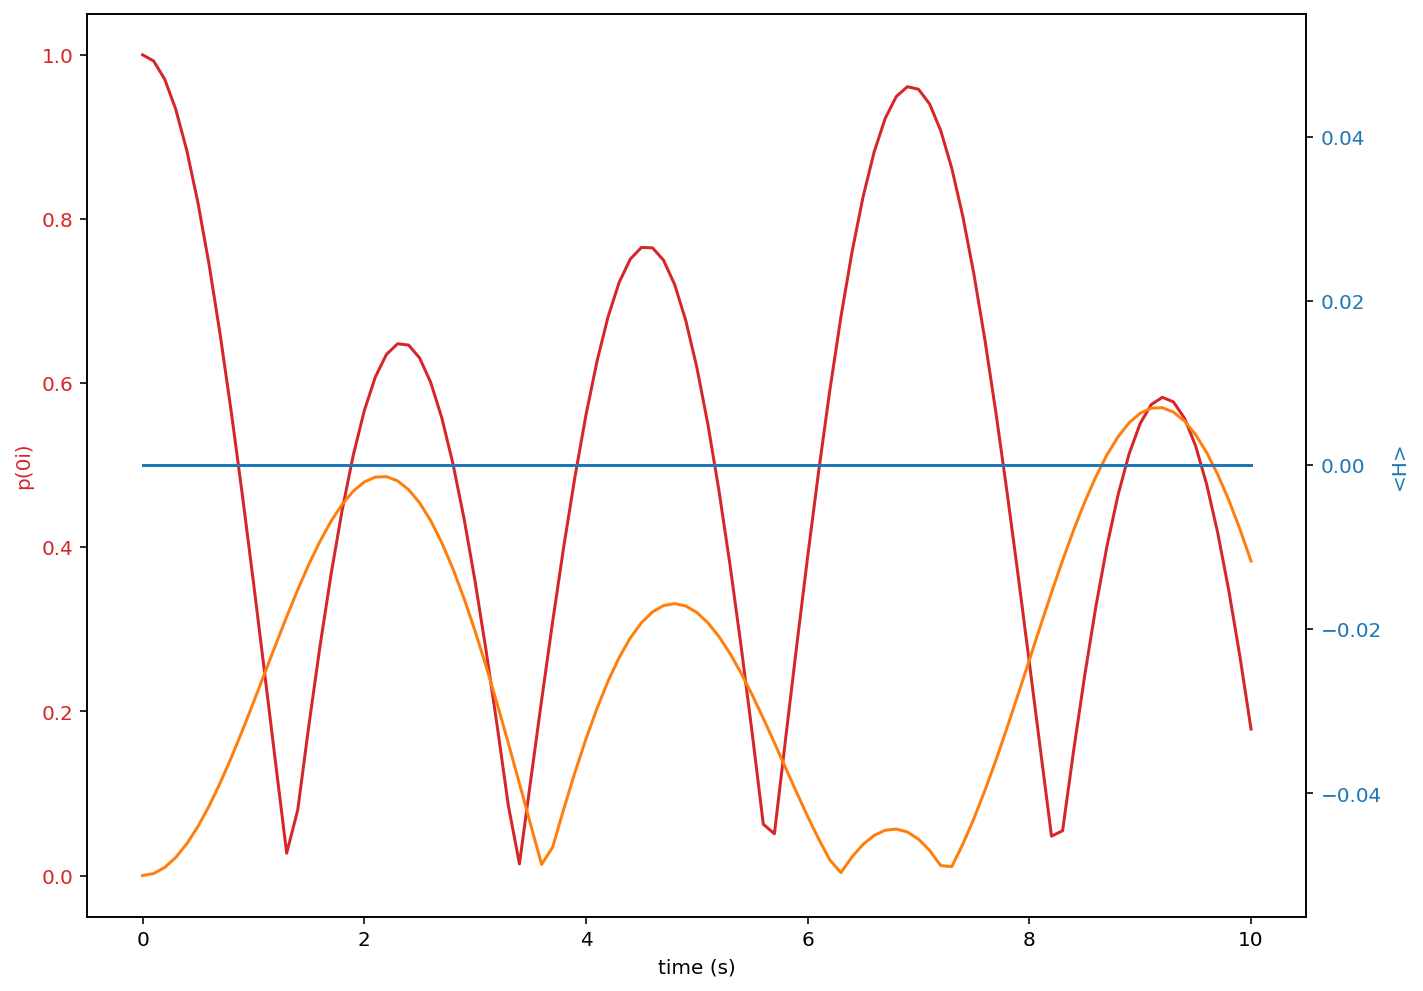

In [107]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('p(0i)', color= 'tab:red')
ax1.plot(tlist,p00list, color= 'tab:red')
ax1.plot(tlist,p01list, color= 'tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('<H>', color='tab:blue')  # we already handled the x-label with ax1
ax2.plot(tlist,Hvevtlist, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()